<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/ExponentiallyWeightedMovingAverage_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exponentially Weighted Moving Average-EWMA**

EWMA is a technique using which you find trend in a time series based data. Time series data means fluctuation of stock price of the company over a period of time,temperature of the city over a period of year etc.

EWMA is used in time-series forcasting,companies use it in financial forcasting,in science it is used in signal processing and we will use it in deep learning for building some cool optimizers.

While calculation of EWMA , you give more weightage to the points which was added latest. Consider a time series data of temperature of the city over a period of each day of month.So while calculating the EWMA of this data, we will give more weightage to the temp value of date 31st than 30th than 29th than 28th........than 2nd than 1st day of that month.

Over a period of time, weightage of a perticular datapoint decreases.This happens due to addition of new latest datapoints and we are giving more weightage to the new datapoints so as a result over a period of thime weightage of a perticular selected point decreases.

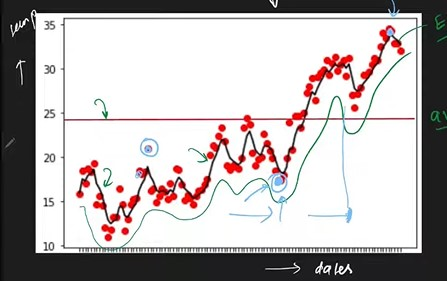

Consider above graph,dates on x axis and temperature on y axis.Temperatue over different dates are plotted.Red line is the exaxct mean of temperature values and black line is the Exponentially Weighted Moving Average of the dataset. EWMA gives us the trend of time-series data.

Mathematical Formula of EWMA is as follows-

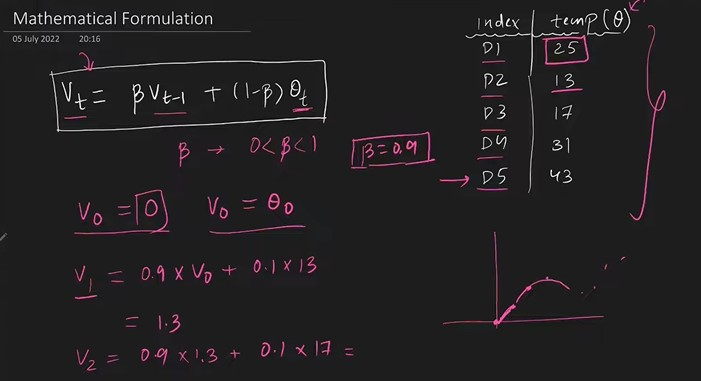

Here beta is a constant and most of the optimizers use beta value equal to 0.9 because it gives proper EWMA curve.

Observe the following EWMA curves of same data with different beta values:

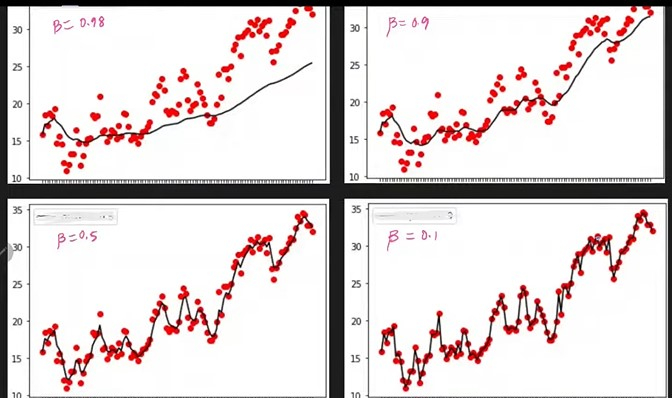

We can observe that EWMA is best on beta value of 0.9

**Lets see how to calculate Exponentially Weighted Moving Average in Python-**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset Used Is - https://www.kaggle.com/datasets/sukhmandeepsinghbrar/daily-delhi-climate

In [2]:
df = pd.read_csv('/content/DailyDelhiClimate.csv')

In [4]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
df.drop(['humidity'],axis=1,inplace=True)
df.drop(['wind_speed'],axis=1,inplace=True)
df.drop(['meanpressure'],axis=1,inplace=True)

In [6]:
df.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [9]:
df #There are 1576 rows and 2 columns

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1571,2017-04-20,34.500000
1572,2017-04-21,34.250000
1573,2017-04-22,32.900000
1574,2017-04-23,32.875000


In [11]:
df=df.iloc[:150]

Text(0, 0.5, 'meantemp')

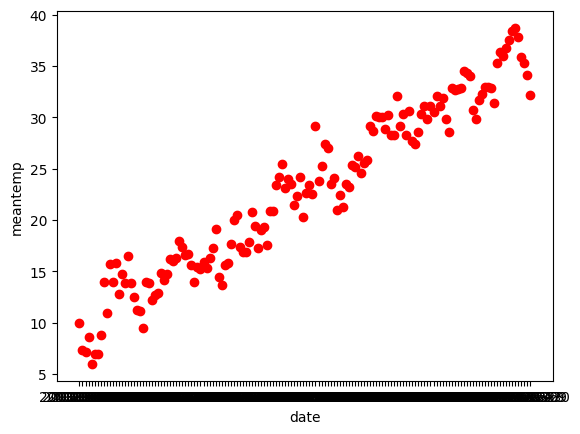

In [12]:
#Plotting the scatter plot of the dataset
plt.scatter(df['date'],df['meantemp'],color='red')
plt.xlabel('date')
plt.ylabel('meantemp')

Now we will calculate EWMA for each datapoint and store it in x

In [13]:
x=df['meantemp'].ewm(alpha=0.9).mean()

In [14]:
x

,meantemp
0,10.000000
1,7.636364
2,7.213213
3,8.521452
4,6.252123
...,...
145,37.887561
146,36.060185
147,35.406018
148,34.269173


In [15]:
df['EWMA'] = x

<ipython-input-15-88cf0cf7f5a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EWMA'] = x


In [16]:
df

,date,meantemp,EWMA
0,2013-01-01,10.000000,10.000000
1,2013-01-02,7.400000,7.636364
2,2013-01-03,7.166667,7.213213
3,2013-01-04,8.666667,8.521452
4,2013-01-05,6.000000,6.252123
...,...,...,...
145,2013-05-26,37.800000,37.887561
146,2013-05-27,35.857143,36.060185
147,2013-05-28,35.333333,35.406018
148,2013-05-29,34.142857,34.269173


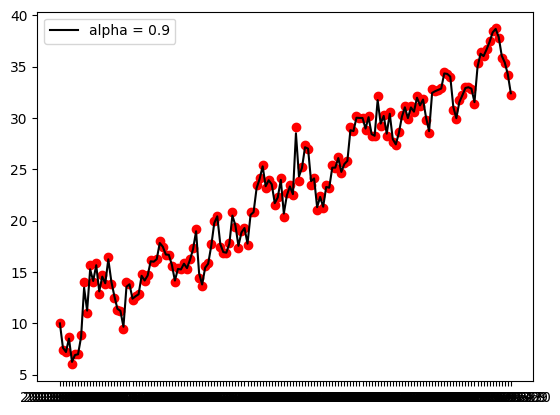

In [18]:
#plotting the EWMA with the dataset
plt.scatter(df['date'],df['meantemp'],color='red')
plt.plot(df['date'],x,color='black',label='alpha = 0.9')
plt.legend()
plt.show()

So as a result we have drawn the EWMA for the given dataset with beta value of 0.9